## cmd 창을 이용하여 데이터 출력
- window 버전 다운로드 : https://github.com/UB-Mannheim/tesseract/wiki
- 환경변수 path 설정 : Tesseract-OCR이 설치된 폴더를 추가
- Cmd 테스트
    - tesseract [이미지 경로] stdout -l kor+eng : 한글과 영문 인식

In [28]:
from PIL import Image
from PIL import ImageFilter
from pytesseract import *

import cv2

In [43]:
from PIL import Image
from pytesseract import *
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

filename = "정수2.jpg"
image = Image.open(filename)
text = pytesseract.image_to_string(image, lang='kor+eng')

text.split('\n')
# with open("sample.txt", "w") as f:
#     f.write(text)

[' ',
 '',
 '에 동참하여 생명 나놈을 &',
 '경과 감사의 마음을 담아 이 SAS',
 '',
 '일자 2016 . OS. |P',
 '',
 'arc es |',
 '',
 '                                                                                                                                                                      ',
 ' ',
 '',
 ' ',
 '\x0c']

In [50]:
print(pytesseract.image_to_boxes(Image.open('test1.jpg')))

~ 1 223 195 225 0
~ 121 212 195 223 0
~ 124 203 125 212 0
0 211 213 219 225 0
4 211 213 229 224 0
- 230 216 235 218 0
2 236 213 244 224 0
1 246 213 251 225 0
- 255 217 259 219 0
0 261 213 269 225 0
2 270 213 278 225 0
9 278 213 295 225 0
4 287 213 294 225 0
7 296 213 304 225 0
1 305 213 310 224 0
a 8 177 33 205 0
k 31 176 50 210 0
i 38 178 93 207 0
: 98 176 150 210 0
I 198 173 218 207 0
l 221 173 234 208 0
l 236 174 243 208 0
i 244 174 256 208 0
M 260 174 269 209 0
i 271 175 277 209 0
l 280 175 284 209 0
l 285 175 292 209 0
i 294 175 322 209 0
4 36 137 46 149 0
3 73 138 82 150 0
: 84 146 86 148 0
B 94 141 108 155 0
e 109 142 136 156 0
u 213 143 234 155 0
g 236 143 245 155 0
g 248 144 258 155 0
: 255 143 258 155 0
2 264 147 276 160 0
S 278 147 290 161 0
4 296 149 303 160 0
0 296 149 318 159 0
0 309 149 319 160 0
m 319 149 329 156 0
L 330 149 336 160 0
g 37 116 58 128 0
g 61 117 71 128 0
a 73 117 83 129 0
: 85 125 87 127 0
9 96 123 101 133 0
9 103 123 119 134 0
5 120 123 128 134 0
. 129 

In [51]:
print ( pytesseract . image_to_data ( Image . open ( 'test1.jpg' )))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	371	225	-1	
2	1	1	0	0	0	1	0	194	22	-1	
3	1	1	1	0	0	1	0	194	22	-1	
4	1	1	1	1	0	1	0	194	22	-1	
5	1	1	1	1	1	1	0	194	22	95	   
2	1	2	0	0	0	211	0	99	12	-1	
3	1	2	1	0	0	211	0	99	12	-1	
4	1	2	1	1	0	211	0	99	12	-1	
5	1	2	1	1	1	211	0	99	12	38	04-21-029471
2	1	3	0	0	0	8	15	314	37	-1	
3	1	3	1	0	0	8	15	314	37	-1	
4	1	3	1	1	0	8	15	314	37	-1	
5	1	3	1	1	1	8	15	142	34	0	aki:
5	1	3	1	1	2	198	17	58	35	0	Illi
5	1	3	1	1	3	260	16	62	35	0	Milli
2	1	4	0	0	0	36	64	316	63	-1	
3	1	4	1	0	0	36	64	316	63	-1	
4	1	4	1	1	0	36	64	300	24	-1	
5	1	4	1	1	1	36	76	10	12	77	4
5	1	4	1	1	2	73	75	13	12	44	3:
5	1	4	1	1	3	94	69	42	15	22	Be
5	1	4	1	1	4	213	70	45	12	26	ugg:
5	1	4	1	1	5	264	64	26	14	24	2S
5	1	4	1	1	6	296	65	40	11	48	400mL
4	1	4	1	2	0	37	86	306	23	-1	
5	1	4	1	2	1	37	96	50	13	38	gga:
5	1	4	1	2	2	96	90	78	12	20	995.422
5	1	4	1	2	3	213	92	10	12	8	og
5	1	4	1	2	4	249	91	13	12	0	we
5	1	4	1	2	5	271	86	26	16	70	Me
5	1	4	1	2	6	3

In [67]:
import cv2

img_cv = cv2.imread('test1.jpg')

# By default OpenCV stores images in BGR format and since pytesseract assumes RGB format,
# we need to convert from BGR to RGB format/mode:
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
print(pytesseract.image_to_string(img_rgb, lang='kor+eng'))
# OR
# img_rgb = Image.frombytes('RGB', img_cv.shape[:2], img_cv, 'raw', 'BGR', 0, 0)
# print(pytesseract.image_to_string(img_rgb, lang='kor+eng'))

   
   
 

   
   

04-21-029471
현증서벌

헌혈증서`0 | | | it

저 ㅣ 명: 황재현           gga: AH 400mL

age: 995.422 4 # Me Oo

하신 귀하여게

 
 
 

사랑의 현혈에 등참하여 생명 나]
깊은 ZAM 감사의 마음을 담아 이 중
헌렵일자: 2021. 3. 7.

혈역원명: 부산혈액원(051 810 9000)

보건복지부장관

 

  
 

 



In [68]:
# Example of adding any additional options.
custom_oem_psm_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(image, config=custom_oem_psm_config)

'By = 04-16-017916\n\nve of AUNT\ns ei Z\\4 wesacig ZOO\naeeees of 20 s #08 Ba\nAQ) aol Susi YY es BA Alas! Falla\nHe LAF GAS ES gobo] ee SAU\nHwa 2016 SSlic\nBowe: ealgional\n\na 4aApt Si\n\nee\n\x0c'

In [73]:
# Example config: r'--tessdata-dir "C:\Program Files (x86)\Tesseract-OCR\tessdata"'
# It's important to add double quotes around the dir path.
tessdata_dir_config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR\tessdata"'
pytesseract.image_to_string(image, lang='eng+kor', config=tessdata_dir_config)

' \n\n에 동 참 하여 생명 나 놈 을 &\n경과 감 사 의 마 음 을 담아 이 SAS\n\n일자 2016 . OS. |P\n\narc es |\n\n     \n \n\n \n\x0c'

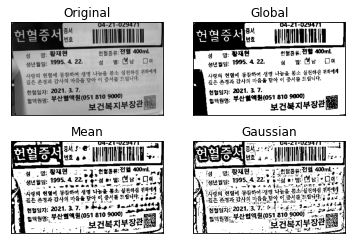

In [75]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread('test1.jpg',0)
# img = cv2.medianBlur(img,5)

ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)



th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,15,2)

titles = ['Original','Global','Mean','Gaussian']

images = [img,th1,th2,th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [76]:
th2

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0, 255, 255],
       [255, 255, 255, ...,   0, 255, 255],
       ...,
       [255,   0, 255, ..., 255, 255, 255],
       [255,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0]], dtype=uint8)

In [81]:
# 배열을 이미지로 변환
image = Image.fromarray(th2.astype('uint8'), 'L')
text = pytesseract.image_to_string(image, lang='kor+eng')
text

'                                                                                                                                                    \n  \n  \n\naga aaa saa a 자논을\npeer ery sei 담아 이\n을 wpa 2021. 2.7. 대개 cree)\n힙맥원명; 부산헬액원(051 810 9000)\n-           A  보건복지  지부:  장관\n\x0c'

In [77]:
filename = "정수2.jpg"
image = Image.open(filename)
text = pytesseract.image_to_string(image, lang='kor+eng')

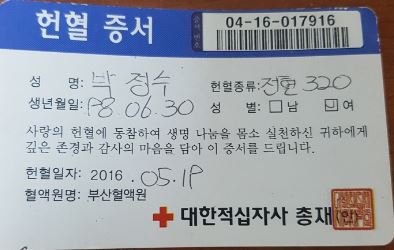

In [78]:
image